# Example using Sympy Mechanics Package
## Mass on a Ring
The equation of motion for "Mass on a Ring" problem as described in lecture notes 8 is derived by means of the Python package Sympy and the sub-package mechanics. Further information is found on http://www.sympy.org and http://docs.sympy.org/latest/modules/physics/mechanics/index.html.

## Set up environment
First, the Sympy and the mechanics package is imported. init_vprinting is a function for printing of expressions generated in the sympy.physics vector package.

In [1]:
#%% Import packages and set up vector printing
import sympy as sp
import sympy.physics.mechanics as me
from sympy.physics.vector import init_vprinting
init_vprinting()

## Define triads, symbolics, generalized coordinates

In [7]:
# Define Reference Frames (Triads, cartesian)
Inertial = me.ReferenceFrame('N') # Rotation omega about z-axis
a = me.ReferenceFrame('a')
b = me.ReferenceFrame('b')

# Generalized Coordinates (time dependant symbols) and derivatives:
phi = me.dynamicsymbols('varphi') # Defines a time dependant variable
#phid = me.dynamicsymbols('varphi, theta', 1) # ... and its' 1st time derivative if needed in the expressions

# Time independant variables:
t, m, g, R, omega = sp.symbols('t, m, g, R, omega')

#%%
# Set relations between reference frames
#help(a.orient)
b.orient(Inertial, 'Axis', (omega*t, Inertial.z))
a.orient(b, 'Body', [0,-phi,0], 'XYZ')

## Checking the rotions
The Direction Cosine Matrix of each frame may be printed by the following:

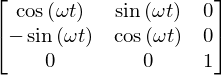

In [8]:
# Checks:
b.dcm(Inertial) # Direction Cosine Matrix

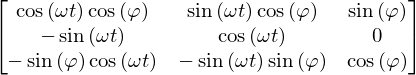

In [9]:
a.dcm(Inertial)

In [10]:
b.ang_vel_in(Inertial).express(a) # Angular velocity of b in inertial_frame in terms of a-basis

## Define points and set velocities

In [11]:
# Declare points (stores the position, velocity, and acceleration)
O = me.Point('O') # Origo point
A = O.locatenew('A', -R * a.z) # Mass point
A.pos_from(O).express(a) # A little check
#help(me.Point)

In [12]:
# Set point velocities
O.set_vel(Inertial, 0*Inertial.x) # Fixes O in Inertial frame
A.v2pt_theory(O, Inertial, a) # v_A = V_O + omega x r_OA
A.vel(Inertial) # Velocity vector

In [13]:
# Define particle mass
mp = me.Particle('m_p', A, m)

## Potential Energy
Since there are many definitions of potential energy, there is no built in function for this. The potential energy from the conservative gravity force is found by the expression from the position vector from A to O.

In [16]:
# Set potential energy
h = A.pos_from(O).to_matrix(Inertial)
h
mp.potential_energy = m * g * h[2]
V = mp.potential_energy
V

## Kinetic Energy
The built in function is used.

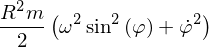

In [17]:
T = mp.kinetic_energy(Inertial).factor()
T

## Langrangian
The lagrangian is calculated manually..

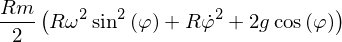

In [22]:
L = T-V
L.factor()

Which yields the same as the built in function...

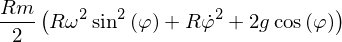

In [21]:
lag = me.Lagrangian(Inertial, mp)
lag.factor()

## Lagranges Equation
Lagranges equation calculated manually and by the built in function.

In [23]:
# Manual derivation, Lagranges equation
phid = phi.diff(t)
L.diff(phid).diff(t) - L.diff(phi)

In [24]:
# Same as above by built in function
#help(me.Lagrangian)
LM = me.LagrangesMethod(lag, [phi])
LM.form_lagranges_equations()
LM.eom

The resulting EOMs are the same as in the example presented in lecture 8.